In [84]:
import urllib.request
import pandas as pd

In [85]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7fed340aea00>)

In [86]:
checkouts_df = pd.read_csv(checkout_file)

In [87]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


In [88]:
checkouts_df.shape

(10000, 12)

In [89]:
#Verlage: Anzahl pro Verlag zählen
checkouts_df["publisher"].value_counts()

Random House, Inc.                                           439
HarperCollins Publishers Inc.                                340
Penguin Group (USA), Inc.                                    313
Books on Tape                                                201
Blackstone Audio, Inc.                                       192
                                                            ... 
Knopf,                                                         1
Severn House Publishers L,                                     1
Grosset & Dunlap, an imprint of Penguin Group (USA) Inc.,      1
Cleis,                                                         1
HighBridge,                                                    1
Name: publisher, Length: 2987, dtype: int64

<AxesSubplot:>

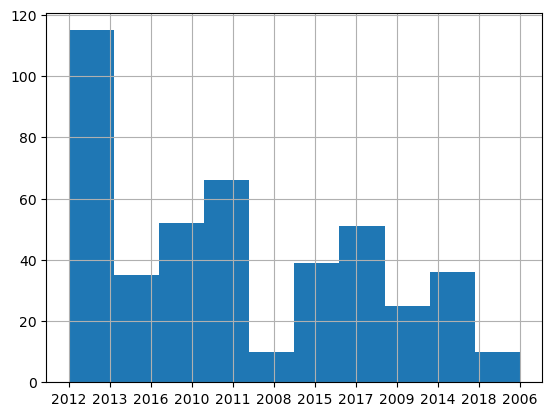

In [90]:
#Verlag=Random House. Wie verteilen sich die Anzahl der Veröffentlichungen pro Jahr (unsortiert)
checkouts_df[checkouts_df["publisher"]=='Random House, Inc.']["publicationyear"].hist()

<AxesSubplot:>

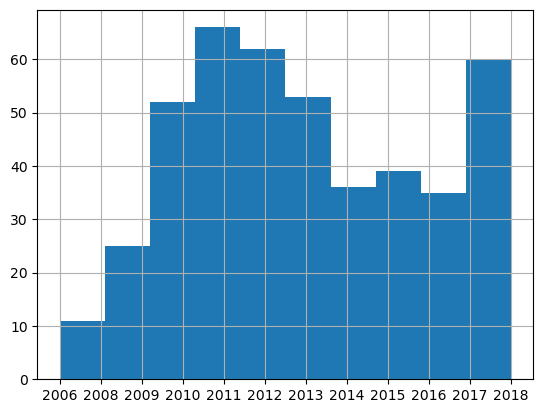

In [91]:
#neuen Dataframe nur mit Verlag=Random House. Verteilung der Anzahl pro Jahr, diesmal aufsteigend sortiert
checkouts_df_random=checkouts_df[checkouts_df["publisher"]=='Random House, Inc.']
#checkouts_df_random.sort_values('publicationyear')
checkouts_df_random.sort_values('publicationyear')["publicationyear"].hist()

<AxesSubplot:ylabel='checkouttype'>

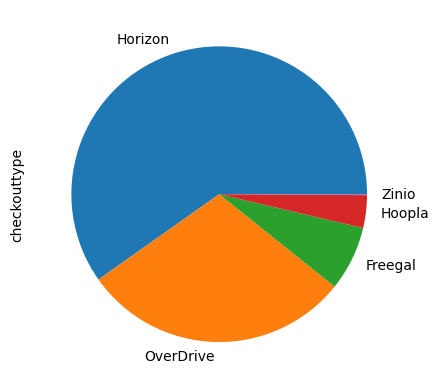

In [120]:
#Tortendiagramm für den Checkouttype
checkouts_df["checkouttype"].value_counts().plot(kind="pie")

<AxesSubplot:>

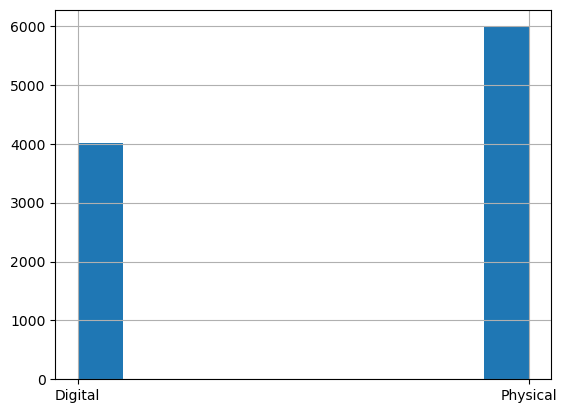

In [117]:
#Histogramm für die Usageclass
checkouts_df["usageclass"].hist()

<AxesSubplot:>

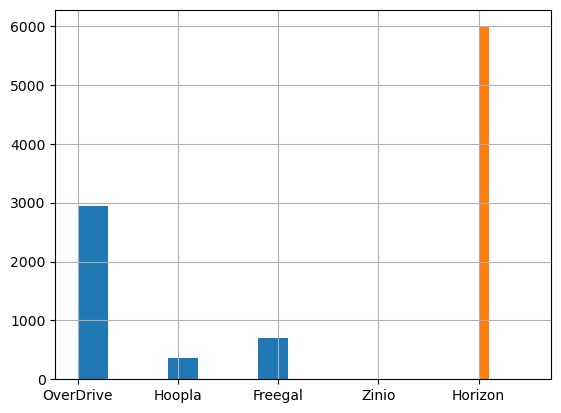

In [134]:
checkouts_df[checkouts_df["usageclass"]=='Digital']["checkouttype"].hist()
checkouts_df[checkouts_df["usageclass"]=='Physical']["checkouttype"].hist()